In [1]:
import pandas as pd

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/Monica/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [36]:
col_types = { 'DPT': 'str'}
df = pd.read_csv("Civil_List_2014.csv", names=["DPT", "NAME", "ADDRESS", "TTL #", "PC", "SAL-RATE"], dtype=col_types)

In [37]:
df.head(10)

,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE
0,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE
1,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
2,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
3,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,$51955.00
4,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00
5,56,I D AADIL,POLICE DEPARTMENT,71012,A,$46953.00
6,69,M AAKIRI,HRA/DEPARTMENT OF SOCIAL S,56056,A,$33000.00
7,464,A AALAI,CUNY QUEENSBOROUGH COMMUNI,4607,N,$73.53
8,998,A V AALEVIK,N.Y.C. TRANSIT AUTHORITY,402,2,$33280.00
9,998,M AAMIR,N.Y.C. TRANSIT AUTHORITY,00T07,4,$60878.00


In [4]:
df['SAL-RATE'].describe()

count        269838
unique        27533
top       $76488.00
freq          26024
Name: SAL-RATE, dtype: object

In [5]:
df.columns # there are spaces after the names of the columns

Index(['DPT     ', 'NAME    ', 'ADDRESS ', 'TTL #   ', 'PC      ', 'SAL-RATE'], dtype='object')

In [8]:
for col in df.columns:
    print(col.strip()) # this prints out each column name with the spaces stripped

DPT
NAME
ADDRESS
TTL #
PC
SAL-RATE


In [11]:
# it's a list, so - []
# i's a loop, so - [for col in df.columns]
# col.strip(), so- [col.strip() for col in columns]
df.columns = [col.strip() for col in df.columns] # this strips the white space for each column and overwrites db 

In [12]:
df.columns

Index(['DPT', 'NAME', 'ADDRESS', 'TTL #', 'PC', 'SAL-RATE'], dtype='object')

In [13]:
df["PC"].value_counts()

A     100521
D      54881
X      24403
4      23259
3      19866
1      13083
K       7635
F       6361
N       4671
U       3409
B       2817
BW      1766
E       1300
W       1257
G       1085
I        730
2        721
M        708
O        536
WK       488
P        307
L         25
S          4
0          3
V          2
Name: PC, dtype: int64

In [14]:
df["SAL-RATE"].describe() # It's a string :O

count        269838
unique        27533
top       $76488.00
freq          26024
Name: SAL-RATE, dtype: object

In [18]:
def money_to_int(money_str):
    return float(money_str.replace("$", "").replace(",",""))
money_to_int("$76488.00")

76488.0

In [19]:
print(money_to_int("$76488.00"))
print(money_to_int("$5.00"))
print(money_to_int("$1,500.00"))

76488.0
5.0
1500.0


In [22]:
df['SAL-RATE'].apply(money_to_int)

0              5.00
1              5.00
2          51955.00
3             12.00
4          46953.00
5          33000.00
6             73.53
7          33280.00
8          60878.00
9          69272.00
10         89960.00
11         38324.00
12         39019.00
13           369.92
14         66127.00
15         64250.00
16         32510.00
17             2.65
18        109087.00
19        111606.00
20             5.00
21         56555.00
22         51643.00
23         77015.00
24         76488.00
25         67627.00
26         68095.00
27         66127.00
28         76689.00
29         48153.00
            ...    
269808     85287.00
269809     65564.00
269810     56937.00
269811     81439.00
269812    118506.00
269813     42064.00
269814        33.18
269815    116364.00
269816     98072.00
269817    107563.00
269818     37150.00
269819     74646.00
269820     64040.00
269821     76488.00
269822     83802.00
269823        17.16
269824     85667.00
269825        46.89
269826        67.42


In [24]:
df['salary'] = df['SAL-RATE'].apply(money_to_int)

In [25]:
df.head()

,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE,salary
0,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,5.0
1,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,5.0
2,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,$51955.00,51955.0
3,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00,12.0
4,56,I D AADIL,POLICE DEPARTMENT,71012,A,$46953.00,46953.0


In [27]:
df['salary'].describe()

count    269838.000000
mean      54143.707486
std       32345.656289
min           0.500000
25%       36899.000000
50%       57855.000000
75%       76488.000000
max      300000.000000
Name: salary, dtype: float64

In [28]:
%matplotlib inline

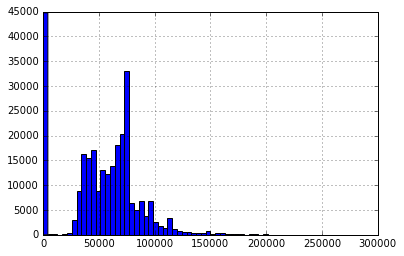

In [29]:
df['salary'].hist(bins=70)

In [39]:
agencies_df = pd.read_csv("cleaned-agencies.csv", dtype='str') # reads every single line as string

In [40]:
#ensures that double digit 0s remain at the beginning of code -- instead of replacing 001 with 1
col_types = { 'code': 'str'}
agencies_df = pd.read_csv("cleaned-agencies.csv", dtype=col_types) # reads every single line as string

In [41]:
agencies_df.head()

,code,agency,is_mayoral
0,002,OFFICE OF THE MAYOR,N
1,003,BOARD OF ELECTIONS,Y
2,004,CAMPAIGN FINANCE BOARD,Y
3,005,BOARD OF ESTIMATE-SECRETARY,Y
4,006,MAYOR'S OFFICE OF OPERATIONS,N


In [42]:
df.head()

,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE
0,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE
1,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
2,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00
3,69,A E A-AWOSOGBA,HRA/DEPARTMENT OF SOCIAL S,52311,A,$51955.00
4,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00


In [45]:
df.merge(agencies_df, left_on='DPT', right_on='code')

,DPT,NAME,ADDRESS,TTL #,PC,SAL-RATE,code,agency,is_mayoral
0,868,B J SANDIFORD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
1,868,C A WIGFALL,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
2,868,K D AABY,DEPARTMENT OF CITYWIDE ADM,10209,X,$12.00,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
3,868,R L AARON,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
4,868,E ABAD,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
5,868,J ABADI,DEPARTMENT OF CITYWIDE ADM,10209,X,$10.75,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
6,868,F A ABBAN,DEPARTMENT OF CITYWIDE ADM,10209,X,$10.36,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
7,868,A ABBOUDI,DEPARTMENT OF CITYWIDE ADM,10209,X,$9.00,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
8,868,R F ABDALLAH,DEPARTMENT OF CITYWIDE ADM,10209,X,$10.00,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
9,868,N A ABDELGADER,DEPARTMENT OF CITYWIDE ADM,12702,X,$5.00,868,DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES,N
